In [22]:
import numpy as np, json, ast
from time import time
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot
from numpy.linalg import norm
from joblib import Parallel, delayed

In [23]:
with open('id_ques_map.json') as fh:
    id_ques_map = json.load(fh)
id_ques_map = {int(k):str(v) for k,v in  id_ques_map.items()}
id_ques_map[0] = ''

In [24]:
max(id_ques_map.keys())

537933

In [67]:
sent_embs = np.load('distilbert-base-nli-stsb-mean-tokens_sent_embeddings.npy')
sent_embs.shape

(537934, 768)

In [68]:
sent_embs = sent_embs[:]

In [ ]:
rows = Parallel(n_jobs=8)(delayed(cosine_similarity)(sent_embs[i].reshape(1,-1),sent_embs) 
                           for i in range(sent_embs.shape[0]))
rows = np.array(rows).squeeze(1)

In [ ]:
# rows = []
# for i in range(sent_embs.shape[0]):
#     r = cosine_similarity(sent_embs[i].reshape(1,-1),sent_embs).squeeze(0)
#     rows.append(r)

In [ ]:
# rows = []
# for i in range(sent_embs.shape[0]):
#     sims = cosine_similarity(sent_embs[i].reshape(1,-1), 
#                   np.vstack([sent_embs[:i,], sent_embs[i+1:,]])).squeeze(0)
#     this_sim = np.array([1])
#     r = np.hstack([sims[:i],this_sim,sims[i:]])
#     rows.append(r)

In [ ]:
rows = np.array(rows)
rows.shape

np.save('distilbert_similarities.npy', rows)

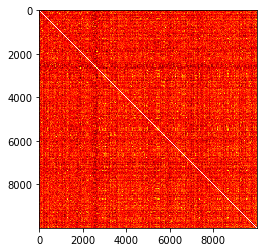

In [64]:
import matplotlib.pyplot as plt
import numpy as np

a = rows
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

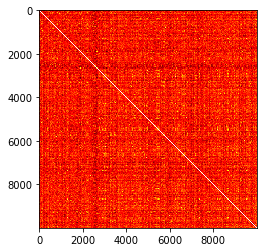

In [65]:
import matplotlib.pyplot as plt
import numpy as np

a = cosine_similarity(sent_embs)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [66]:
sum(abs(rows - cosine_similarity(sent_embs))).sum()

2.79446